In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

ATTACK = '1'
BENIGN = '0'
OTHERS = '-1'

def make_graph(ts_dict,i):

    # Convert to DataFrame
    df1 = pd.DataFrame({'time': ts_dict[BENIGN], 'source': BENIGN})
    df2 = pd.DataFrame({'time': ts_dict[ATTACK], 'source': ATTACK})
    df3 = pd.DataFrame({'time': ts_dict[OTHERS], 'source': OTHERS})
    df = pd.concat([df1, df2, df3])

    # Group into 5-second intervals
    df['bin'] = (df['time'] - df['time'].min()).dt.total_seconds() // 30*30
    df['bin'] = df['bin'].astype(int)

    # Count occurrences per source and interval
    counts = df.groupby(['bin', 'source']).size().unstack(fill_value=0)

    # Ensure consistent order
    counts = counts.sort_index()

    # Create stacked bar plot
    plt.figure(figsize=(12, 5))
    plt.bar(counts.index, counts[BENIGN], width=30, color='blue', label='BENIGN')
    # plt.bar(counts.index, counts[ATTACK], width=30, bottom=counts[BENIGN], color='red', label='ATTACK')
    # plt.bar(counts.index, counts[OTHERS], width=30, bottom=counts[BENIGN] + counts[ATTACK], color='green', label='OTHERS')

    # Formatting
    plt.xlabel("Time (5-second intervals since start)")
    plt.ylabel("Number of packets")
    plt.title("Packet count comparison per 5-second interval")
    plt.legend()
    plt.margins(x=0)
    plt.margins(y=0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.savefig(f"./output/packet_count/benign/{i}.png")


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (1).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (2).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (3).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (4).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (5).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (6).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (7).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (8).json


/tmp/ipykernel_462837/1550738457.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2, df3])


Plotted background noise for ../../data/pre_process/dissection_clean/benign_original (9).json


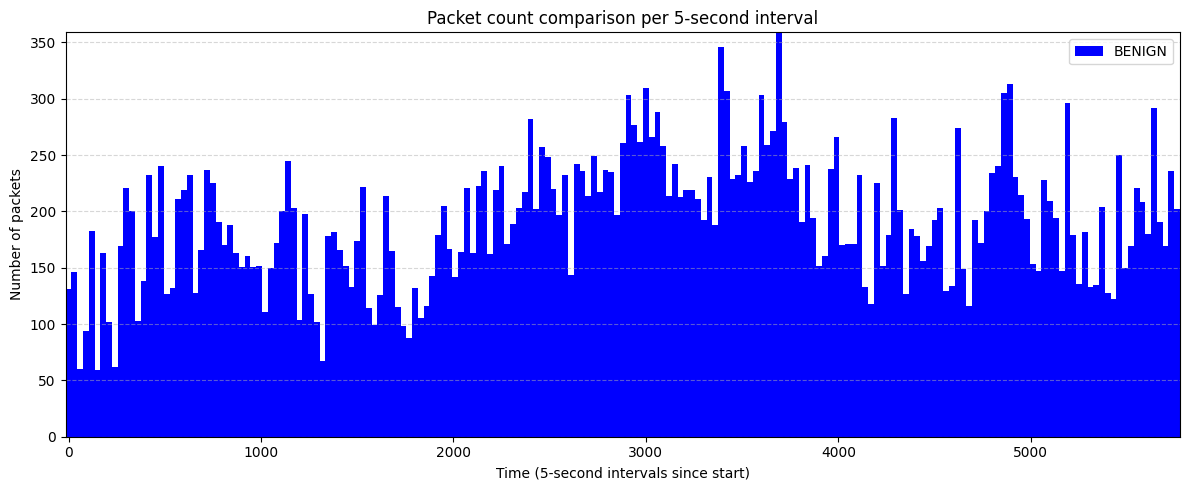

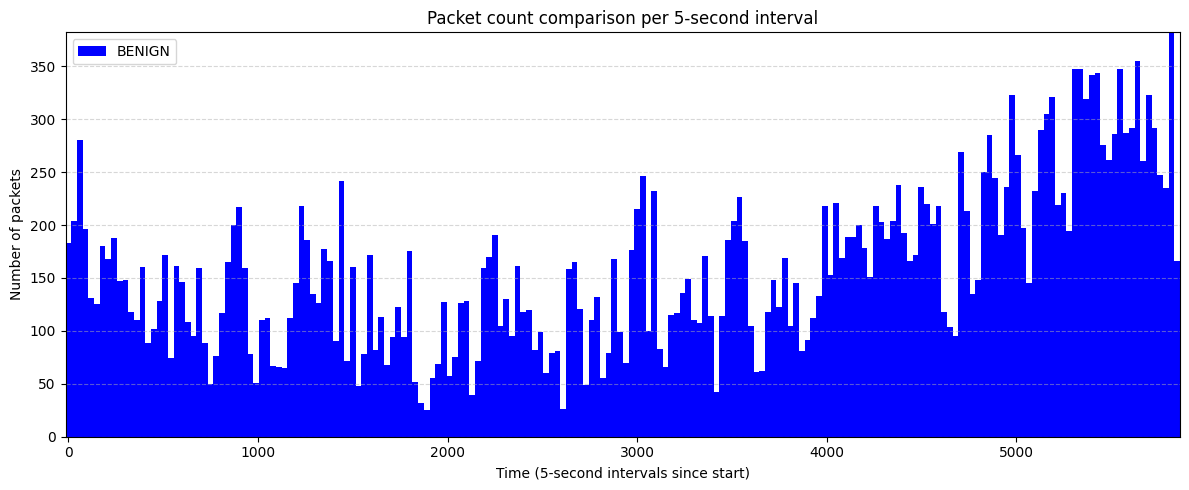

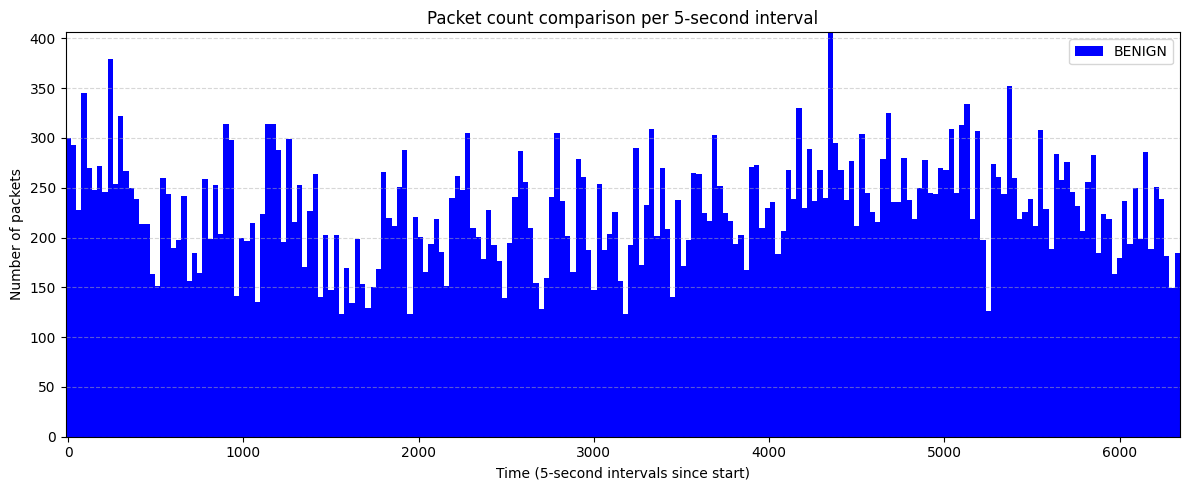

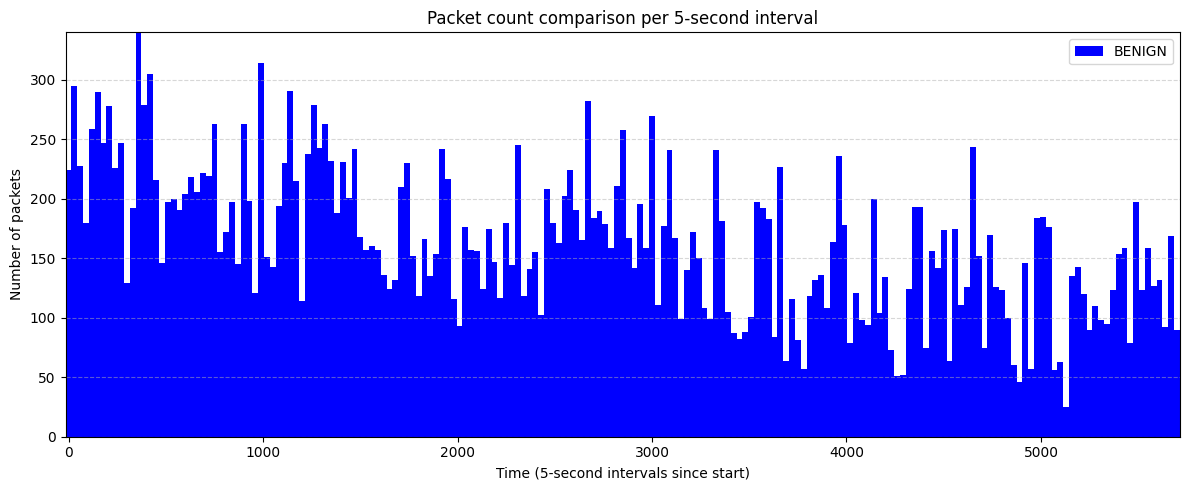

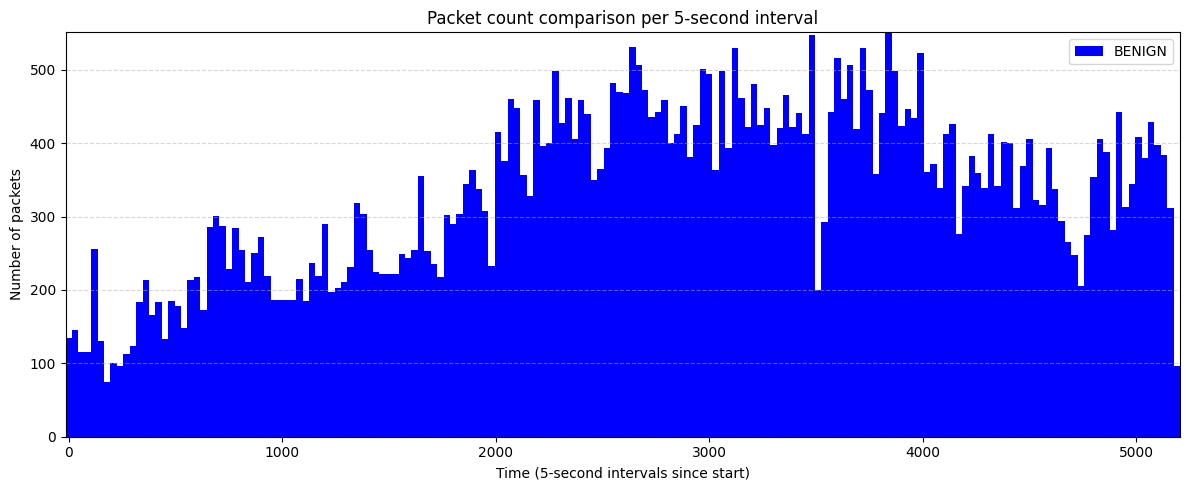

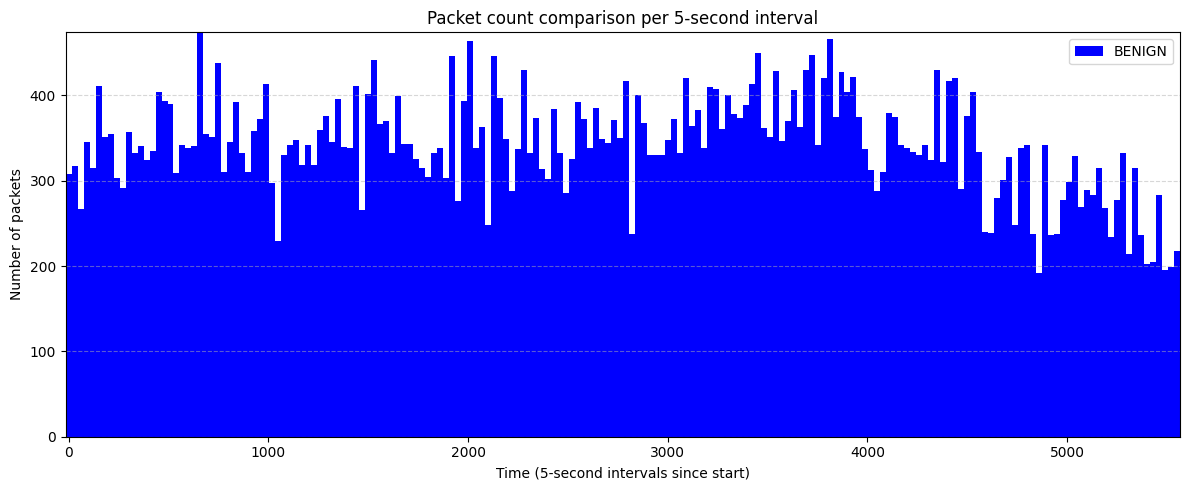

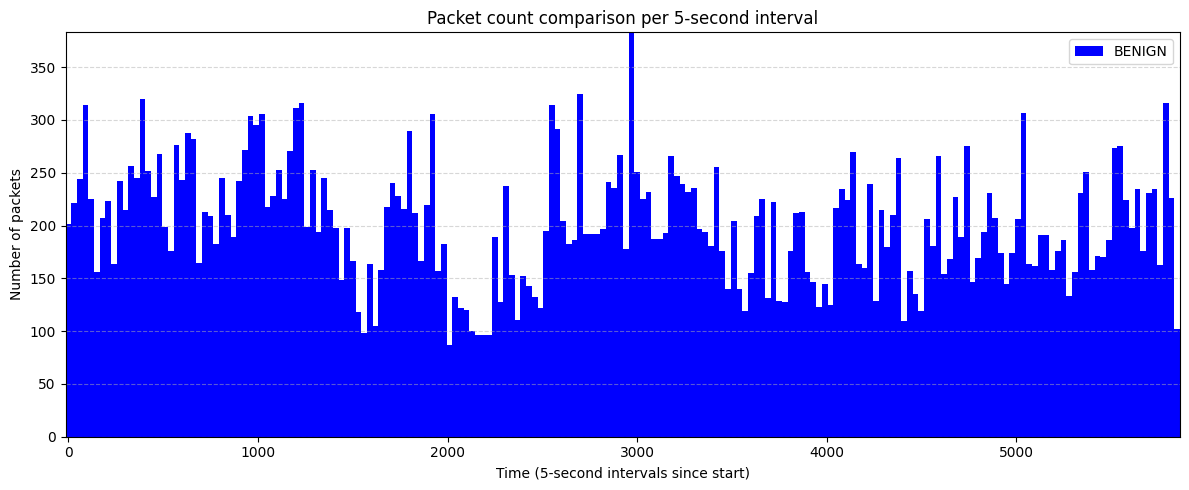

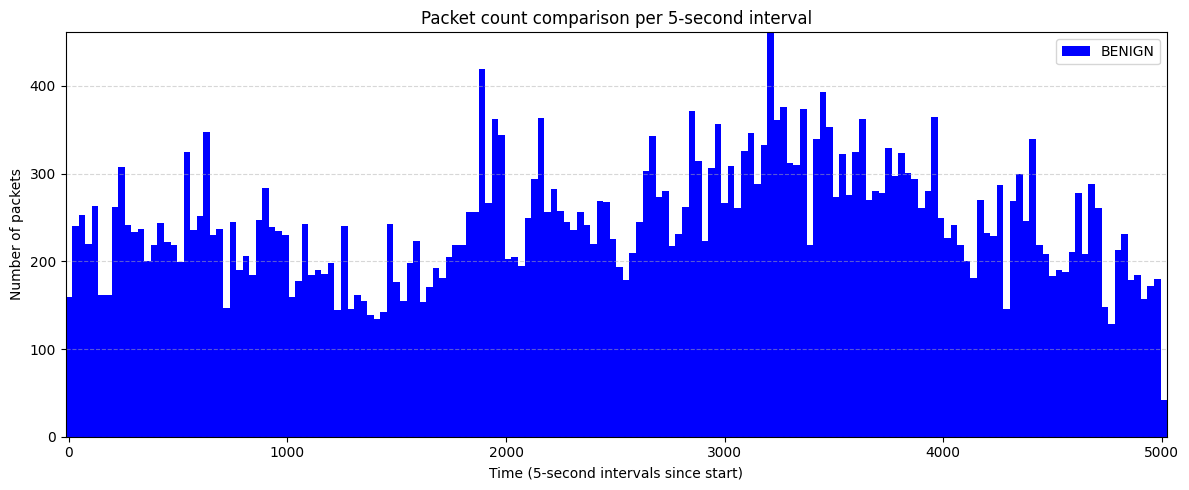

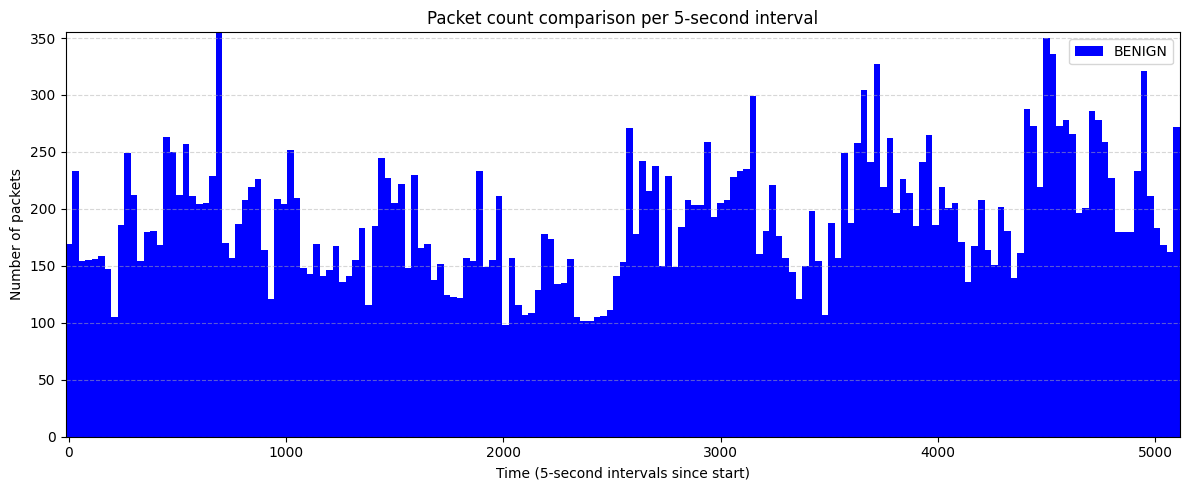

In [11]:
import json
from datetime import datetime
import glob

for i,filepath in enumerate(sorted(glob.glob("../../data/pre_process/dissection_clean/*.json"))):
    with open(filepath, 'r') as f:
        my_json = json.load(f)

    total_dict = {
        BENIGN : [],
        ATTACK : [],
        OTHERS : []
    }

    for dissected_pkt in my_json:

        is_attack = dissected_pkt["common"].pop("is_attack")
        attack_type = dissected_pkt["common"].pop("type")

        packet_dict = dissected_pkt["common"].copy()
        for protocols in dissected_pkt["protocols"].values():
            for layer in protocols:
                packet_dict.update(layer)

        total_dict[is_attack].append(packet_dict)


    ts_dict = {
        BENIGN : [],
        ATTACK : [],
        OTHERS : []
    }

    for label in [BENIGN, ATTACK, OTHERS]:
        for packet in total_dict[label]:
            ts = packet["ts"]
            ts = datetime.fromtimestamp(ts)
            ts_dict[label].append(ts)

    make_graph(ts_dict,i)
    print(f"Plotted background noise for {filepath}")

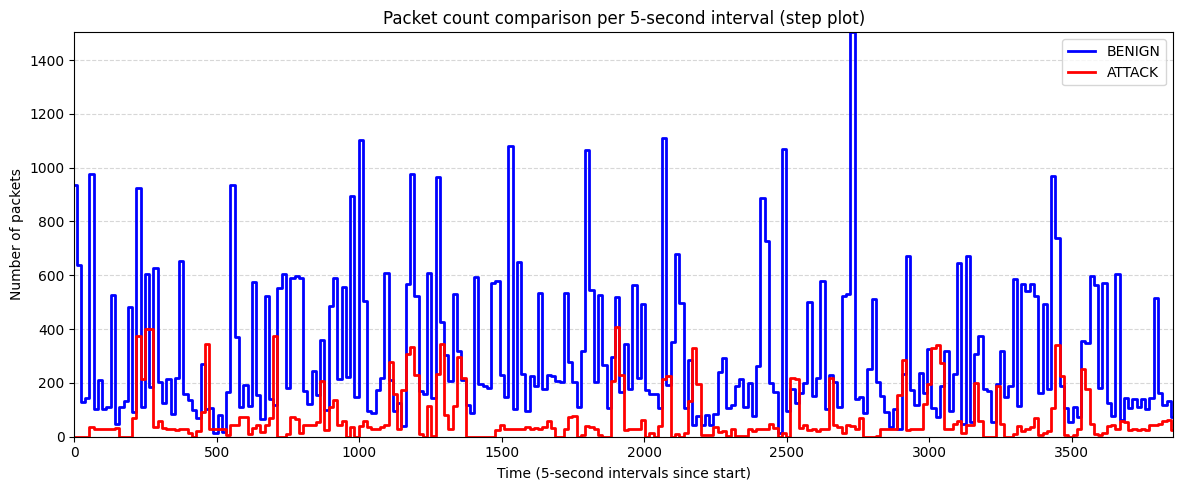

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# Convertir en DataFrame
df1 = pd.DataFrame({'time': ts_dict[BENIGN], 'source': BENIGN})
df2 = pd.DataFrame({'time': ts_dict[ATTACK], 'source': ATTACK})
df = pd.concat([df1, df2])

# Grouper en intervalles de 5 secondes
df['bin'] = (df['time'] - df['time'].min()).dt.total_seconds() // 15*15
df['bin'] = df['bin'].astype(int)

# Compter les occurrences par source et intervalle
counts = df.groupby(['bin', 'source']).size().unstack(fill_value=0)
counts = counts.sort_index()

# Créer le graphique en courbes rectangulaires
plt.figure(figsize=(12, 5))
plt.step(counts.index, counts[BENIGN], where='mid', color='blue', label='BENIGN', linewidth=2)
plt.step(counts.index, counts[ATTACK], where='mid', color='red', label='ATTACK', linewidth=2)

# Mise en forme
plt.xlabel("Time (5-second intervals since start)")
plt.ylabel("Number of packets")
plt.title("Packet count comparison per 5-second interval (step plot)")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.margins(x=0)
plt.margins(y=0)
plt.show()
